Import the needed Python libraries

In [53]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
def correlation_map(df, target) :
    """
    Correlation Heatmap
    Parameters:
        df -- dataframe containing features to plot
        target -- target column name
    """
    classes = df[target].unique()
    corr = df.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corr, vmax=.8,annot=True, square=True)
    b, t = plt.ylim() # Gets the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

In [44]:
def target_variable_exploration(df, target) :
    """
    Plots the distribution of the classes
    Parameters:
        df -- dataframe containing classes
        target -- class column
    """
    sns.pairplot(df, diag_kind ='hist' , hue=target)
    plt.show()

In [8]:
def read_data(file):
    """
    Read data from CSV file
    Parameters:
        file -- CSV file
    Returns:
        dataframe: the dataframe with the content of the file
    """
    return pd.read_csv(file)

In [18]:
def scatter_diagram(data,x,y,color,size,hover_data):
    """
    Build the correlation diagram using specific parameters
    Parameters:
        data -- the data dataframe
        x -- Axis X
        y -- Axis Y
        color -- Colors used in the diagram to categorize
        size -- Size of the points in the diagram
        hover_data -- Info shown when selecting one point in the diagram
    Returns:
        dataframe: the dataframe with the content of the file
    """
    return px.scatter(data,x=x, y=y, color=color,size=size, hover_data=hover_data,trendline="ols", color_discrete_sequence=px.colors.qualitative.D3)


In [45]:
def train_classification_models(iterations, X_train, y_train):
    """
    Train the classification models
    Parameters:
        iterations -- The number of iterations used in the Logistic Regression model
        X_train -- Dataframe with training data in X
        y_train -- Dataframe with training data in Y (Columns)
    Returns:
        models: Dictionary with calculated values from the different models (Logistic Regression, Decision Tree and Random Forest)
    """
    models = {
        'Logistic Regression': LogisticRegression(max_iter=iterations),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)

    return models

In [47]:
def evaluate_model_performance(X_test, y_test, models):
    """
    Evaluate the model performance
    Parameters:
        X_test -- Dataframe with testing data in X
        y_test -- Dataframe with testing data in Y (Columns)
        models -- The models to be evaluated (Dictionary)
    Returns:
        models: Dictionary with predicted values from the different models (Logistic Regression, Decision Tree and Random Forest)
    """
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name}:")
        print(classification_report(y_test, y_pred))
    return models

In [49]:
def visualize_model_comparison(X_test, y_test, models):
    """
    Visualize the model comparison
    Parameters:
        X_test -- Dataframe with testing data in X
        y_test -- Dataframe with testing data in Y (Columns)
        models -- The models to be evaluated (Dictionary)
    Returns:
        Comparison between models
    """
    model_names = list(models.keys())
    accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]
    accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
    return px.bar(accuracy_df, x='Model', y='Accuracy', title='Model Comparison')

Read the data for soybean harvest to start doing the Exploratory Analysis

In [9]:
data = read_data("data.csv")


In [11]:
data.head(10)

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.20,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.20,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.80,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.40,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.40,145.59,3230.99
5,1,MANU IPRO,2,75.80,20.80,69.2,128.00,1.85,7.20,154.87,3374.80
6,1,MANU IPRO,3,84.40,15.80,95.4,161.80,1.70,6.80,150.23,3182.76
7,1,MANU IPRO,4,80.47,18.20,87.8,154.27,1.77,7.13,149.90,3165.72
8,1,77HO111I2X - GUAPORÉ,1,52.20,14.40,64.8,148.80,2.30,7.20,180.25,3640.46
9,1,77HO111I2X - GUAPORÉ,2,55.80,15.80,72.0,188.80,2.62,6.20,176.75,3602.34


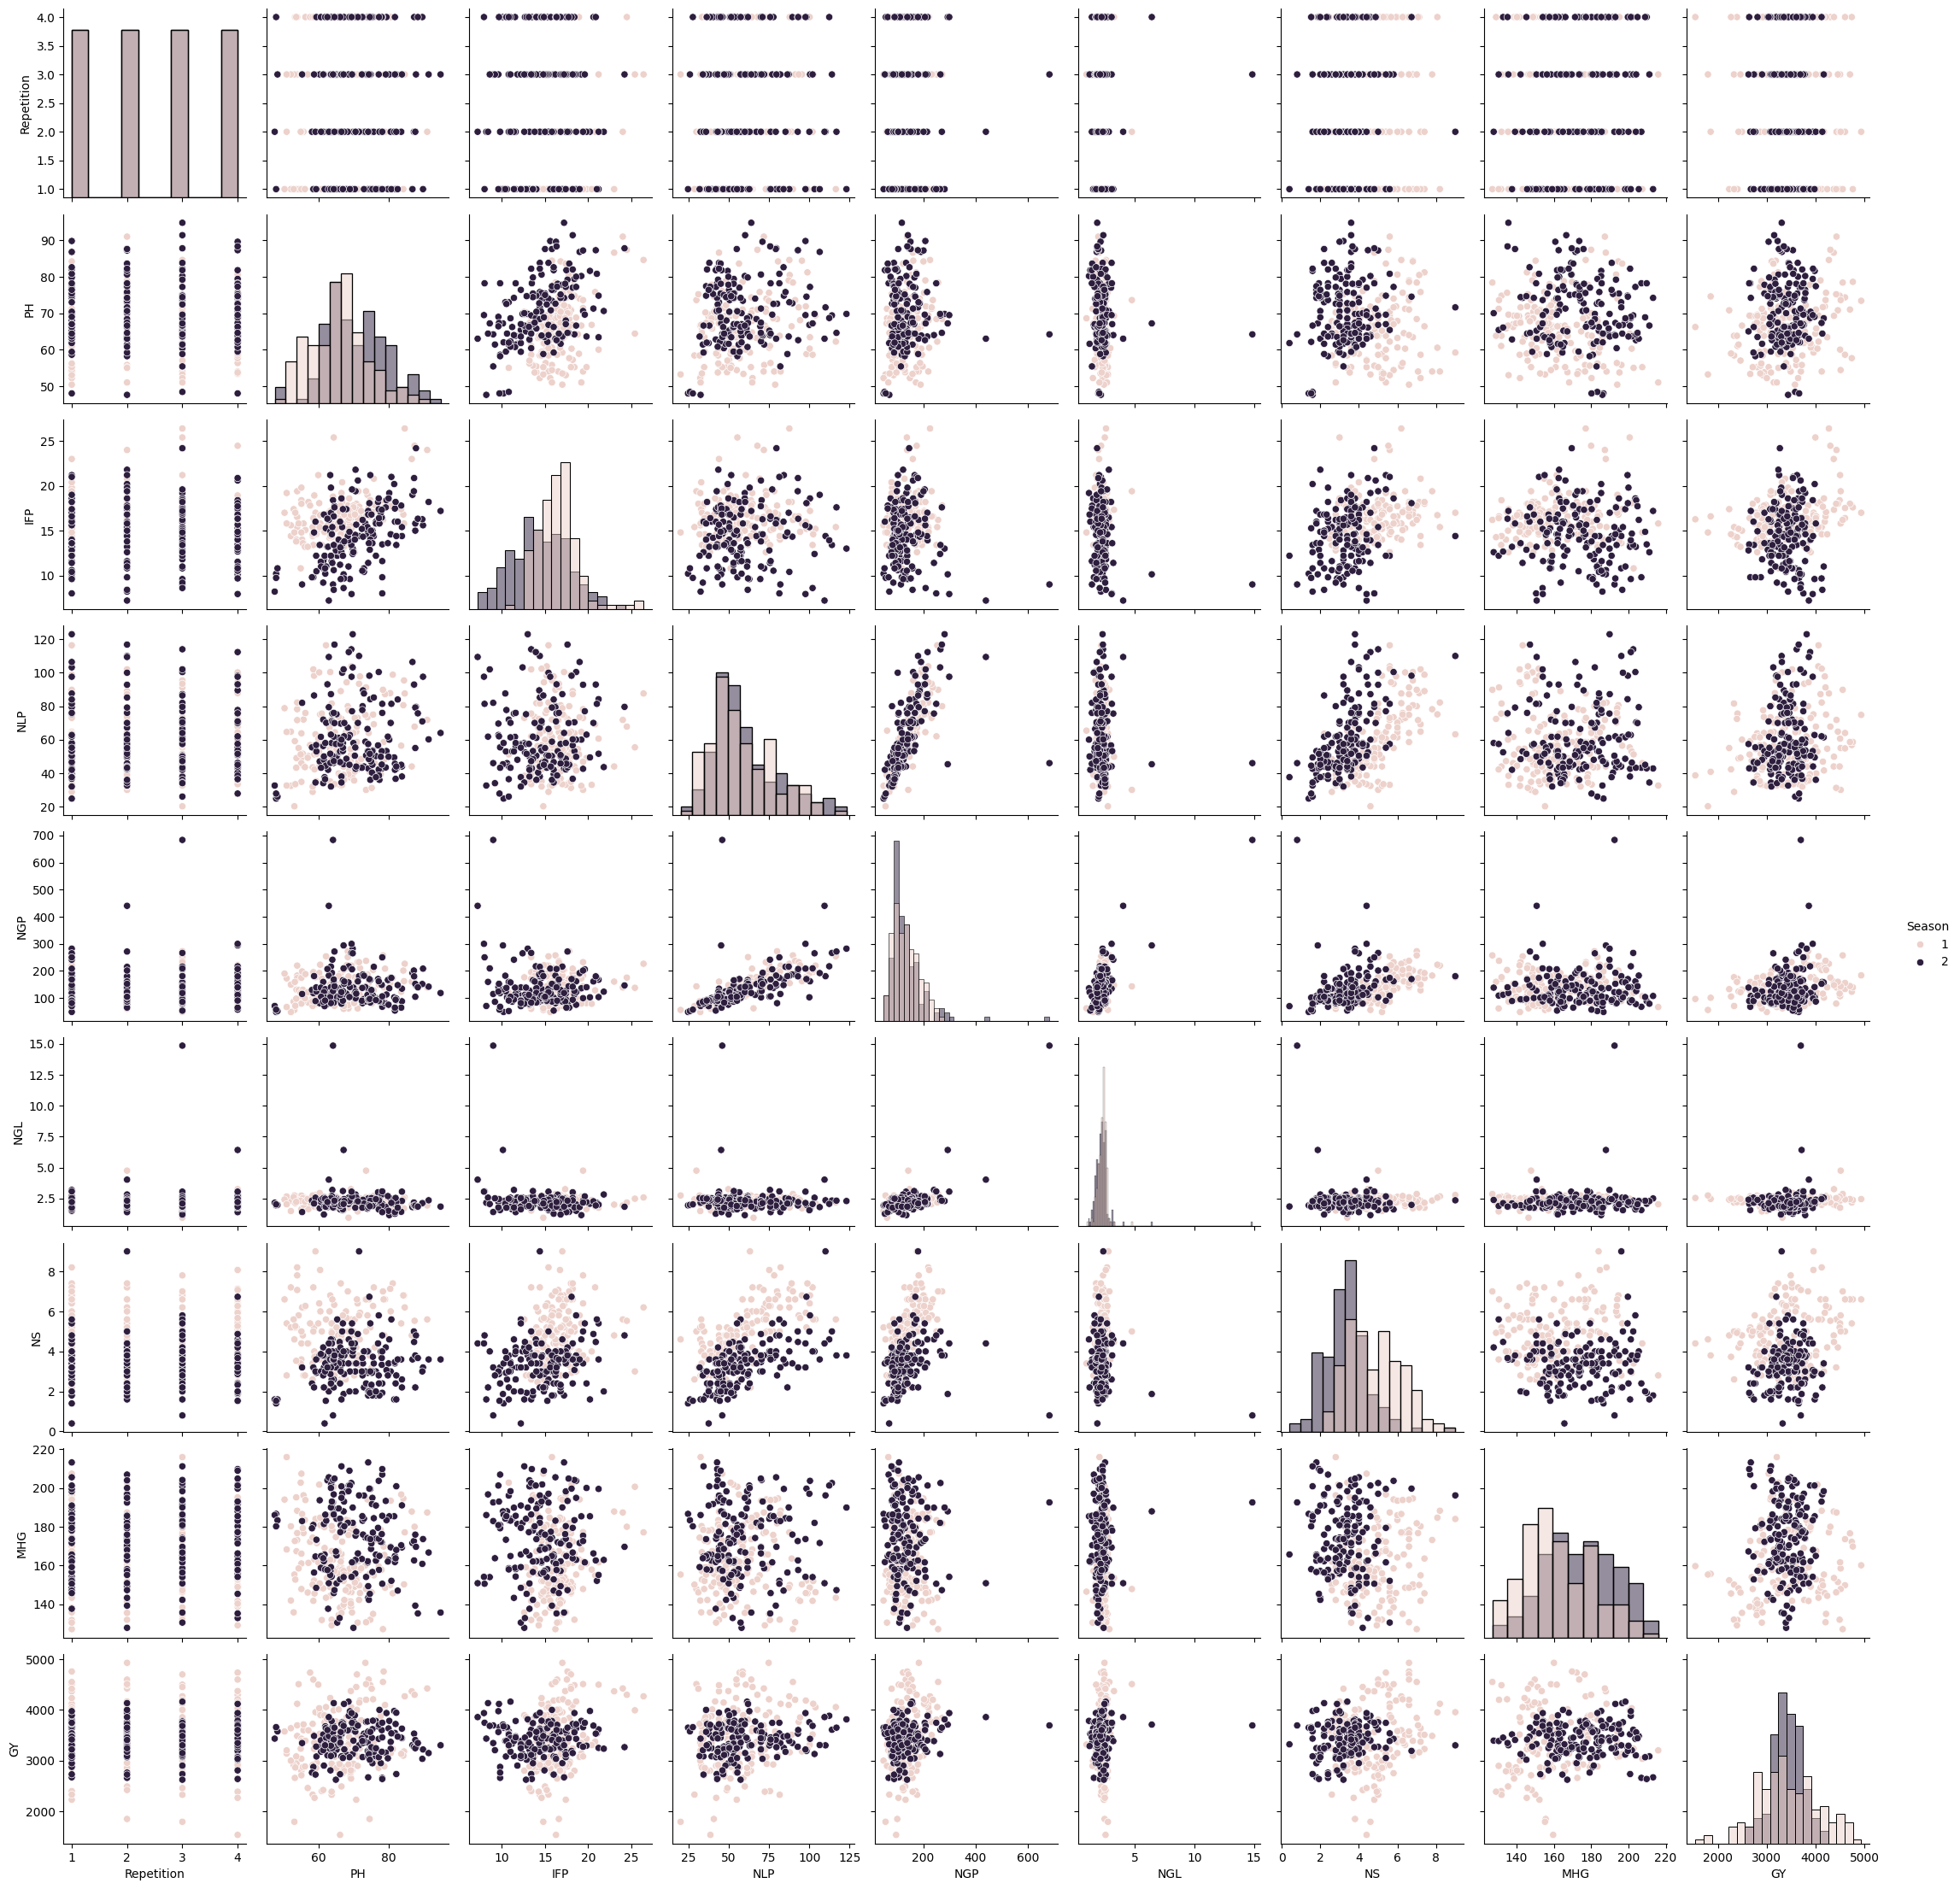

In [ ]:
### Target variable exploration

target_variable_exploration(data, "Season")


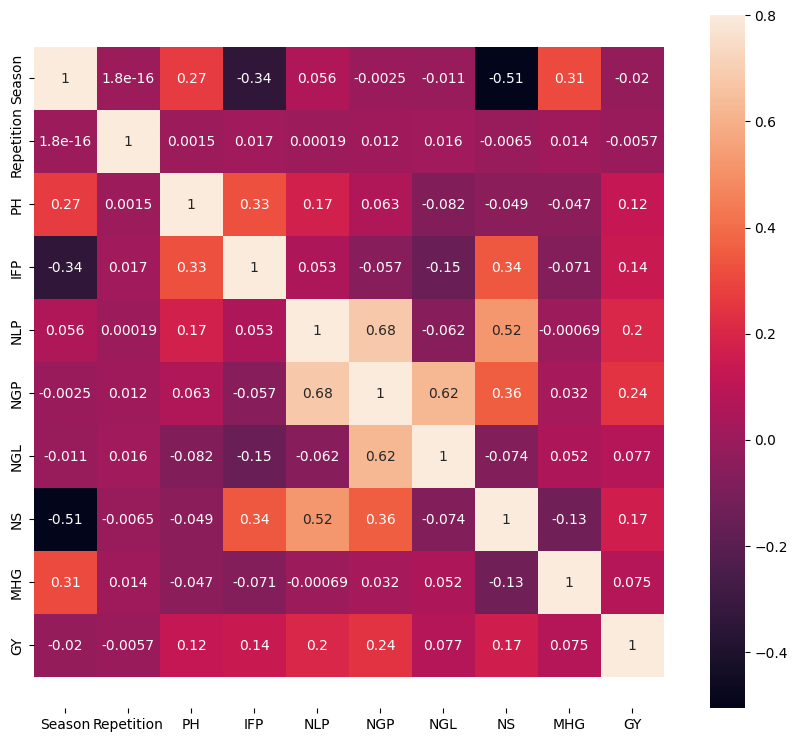

In [ ]:
#check_correlation(data)
correlation_map(data,"Season")

Check the correlation between the variables so we can proceed to answer a question

In this case we have choosen 2 variables with a strong correlation:

*   NLP. Number of Legumes per Plant
*   NS. Number of steams

We could use variables with higher correlation but the graphs doesn't seem to help a lot to classify the data.

In [19]:
fig = scatter_diagram(data,"NLP","NS","Season","MHG","Cultivar")
fig.show()

Create the test set

In [22]:
X = pd.DataFrame(data, columns=['NLP','NS'])
y = pd.Series(data['Season'], name='Season')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Train Classification Models
iterations = 5000
models = train_classification_models(iterations, X_train, y_train)

In [36]:
# Evaluate Model Performance
models = evaluate_model_performance(X_test, y_test, models)


Logistic Regression:
              precision    recall  f1-score   support

           1       0.78      0.88      0.82        32
           2       0.86      0.75      0.80        32

    accuracy                           0.81        64
   macro avg       0.82      0.81      0.81        64
weighted avg       0.82      0.81      0.81        64

Decision Tree:
              precision    recall  f1-score   support

           1       0.68      0.84      0.75        32
           2       0.79      0.59      0.68        32

    accuracy                           0.72        64
   macro avg       0.73      0.72      0.71        64
weighted avg       0.73      0.72      0.71        64

Random Forest:
              precision    recall  f1-score   support

           1       0.74      0.81      0.78        32
           2       0.79      0.72      0.75        32

    accuracy                           0.77        64
   macro avg       0.77      0.77      0.77        64
weighted avg       0.77

In [50]:
# Visualize Model Comparison
fig = visualize_model_comparison(X_test, y_test, models)
fig.show()

In [76]:
def calculate_confusion_matrix(X_test, X_train, y_train, y_test, x_label, y_label, classes, iterations):
    """
    Visualize the model comparison
    Parameters:
        X_test -- Dataframe with testing data in X
        y_test -- Dataframe with testing data in Y (Columns)
        models -- The models to be evaluated (Dictionary)
    Returns:
        Comparison between models
    """
    # Train the logistic regression model
    model = LogisticRegression(max_iter=iterations,solver='liblinear', random_state=0).fit(X_train, y_train)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))

    # classes = wine.target_names
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)

    # Visualize confusion matrix using Plotly Express
    fig = px.imshow(df_cm, labels=dict(x=x_label, y=y_label, color="Count"),
                    x=classes, y=classes, color_continuous_scale="Blues", title="Confusion Matrix")
    return fig

In [75]:
classes = ["Season1", "Season2"]
calculate_confusion_matrix(X_test, X_train, y_train, y_test, "Predicted Class", "True Class", classes, iterations)

fig.update_layout(title="Confusion Matrix", xaxis_title="Predicted Class", yaxis_title="True Class")
fig.show()

In [61]:
confusion_matrix(y_test, model.predict(X_test))

array([[29,  3],
       [ 8, 24]])